Edit distance between benchmark sequences

In [1]:
import editdistance
ba2 = "sequences/BA.2_EPI_ISL_9517080.fasta"
ba1 = "sequences/BA.1_EPI_ISL_9335041.fasta"
ed = editdistance.eval(ba1, ba2)
print(ed)

6


Plot results

In [16]:
from utils import getListOfFiles
import os

all_files = getListOfFiles(os.curdir)
res_path = "predictions_m0.tsv"
res_files = list(filter(lambda p: res_path in p, all_files))
print(res_files)


['./5_seq/kallisto/benchmarks/benchmarks/ww_BA.1vBA.2_reference_set/BA.1_EPI_ISL_10223811_ab50/predictions_m0.tsv', './4_seq/kallisto/benchmarks/benchmarks/ww_BA.1vBA.2_reference_set/BA.1_EPI_ISL_10223811_ab50/predictions_m0.tsv', './6_seq/kallisto/benchmarks/benchmarks/ww_BA.1vBA.2_reference_set/BA.1_EPI_ISL_10223811_ab50/predictions_m0.tsv', './7_seq/kallisto/benchmarks/benchmarks/ww_BA.1vBA.2_reference_set/BA.1_EPI_ISL_10223811_ab50/predictions_m0.tsv', './3_seq/kallisto/benchmarks/benchmarks/ww_BA.1vBA.2_reference_set/BA.1_EPI_ISL_10223811_ab50/predictions_m0.tsv', './2_seq/kallisto/benchmarks/benchmarks/ww_BA.1vBA.2_reference_set/BA.1_EPI_ISL_10223811_ab50/predictions_m0.tsv', './1_seq/kallisto/benchmarks/benchmarks/ww_BA.1vBA.2_reference_set/BA.1_EPI_ISL_10223811_ab50/predictions_m0.tsv', './18_seq/kallisto/benchmarks/benchmarks/ww_BA.1vBA.2_reference_set/BA.1_EPI_ISL_10223811_ab50/predictions_m0.tsv', './10_seq/kallisto/benchmarks/benchmarks/ww_BA.1vBA.2_reference_set/BA.1_EPI_I

In [17]:
import pandas as pd

resBA1 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
resBA2 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]



for res_file  in res_files:
    #get the number of mutations
    nm = res_file[2]
    if res_file[3] != "_":
        nm+= res_file[3]
    nm = int(nm)    
    # print(nm)
    
    # read tsv
    tsv_file = open(res_file).readlines()[2:]
    tv = 50

    # find the other relevant sequence in the list from indices 2 - 11 and calculate relative prediction error
    for item in tsv_file[1:]:
        lineage = item.split("\t")[0]
        ev = float(item.split("\t")[2])

        difference = round(abs(ev-tv), 3)
        relative_error_nm = round(difference/tv, 3)

        
        if lineage == "BA.1":
            resBA1[nm] = ev
            
        
        if lineage == "BA.2":
            resBA2[nm] = ev
        

print(resBA1)
print(resBA2)



[0, 26.36, 49.06, 49.54, 50.75, 51.11, 51.09, 51.14, 51.07, 51.02, 51.03, 0, 0, 0, 0, 0, 0, 0, 50.94, 0, 0, 0, 0, 0]
[0, 73.64, 50.94, 50.46, 49.25, 48.89, 48.91, 48.86, 48.93, 48.98, 48.97, 0, 0, 0, 0, 0, 0, 0, 49.06, 0, 0, 0, 0, 0]


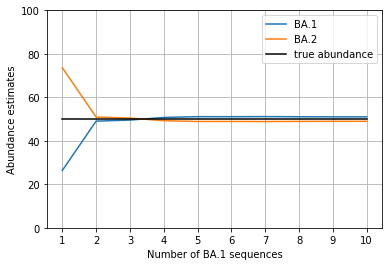

In [19]:
BA1y = resBA1[1:11] #[26.36, 49.06, 49.54, 50.75, 51.11, 51.09, 51.14, 51.07, 51.02, 51.03, 50.94]
BA2y = resBA2[1:11] #[73.64, 50.94, 50.46, 49.25, 48.89, 48.91, 48.86, 48.93, 48.98, 48.97, 49.06]
x = [1,2,3,4,5,6,7,8,9,10]
y = [50,50,50,50,50,50,50,50,50,50]

import matplotlib.pyplot as plt

plt.plot(x,BA1y,label = "BA.1")
plt.plot(x,BA2y,label = "BA.2")
plt.xlabel("Number of BA.1 sequences")
plt.ylabel("Abundance estimates")
plt.plot(x,y,label = "true abundance", color = "black")
plt.grid()
plt.ylim(0, 100)
plt.legend()
plt.xticks(x)
plt.savefig("perLineagevariationbias_exp1_0threshold.pdf")
